# Non Linear Regression Analysis

If the data shows a curvy trend, then liner regression will not produce very accurate results compared to non-linear regression. In this notebook, we fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Though Linear regression is very good to solve many problems, it cannot be used for all datasets. Linear models models relation between a dependent variable y and independent variable x. It had a simple equation **y = 2x + 3**

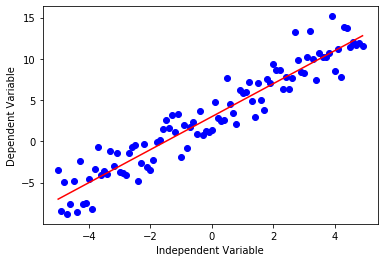

In [8]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Non-linear regressions are a relationship between independent variable sx and a dependent variable y which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$).

$$ \ y = a x^3 + b x^2 + cx + d \ $$

$$ \ y = log (x) \$$

 or even more complicated ones
 
 $$ \ y = log(a x^3 + b x^2 + cx +d) $$

Let's take a look at a cubic's functions graph

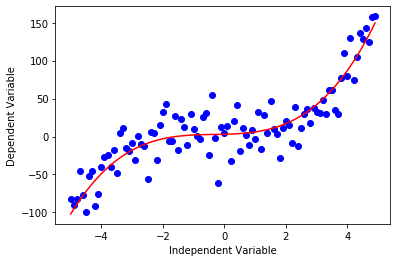

In [12]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3

y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Quadratic function

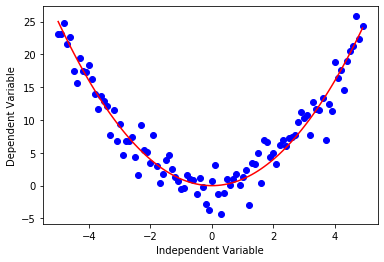

In [17]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)

y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


Exponential


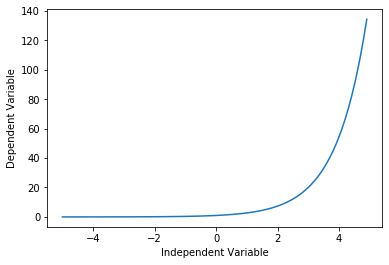

In [19]:
X = np.arange(-5.0, 5.0, 0.1)

y = np.exp(X)

plt.plot(X, y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Logarithmic 

The response of y is a results of applying logarithmic map from input $x$'s to output variable. 
$$ \ y = log(x) \ $$

/Users/badisamosesane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/badisamosesane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


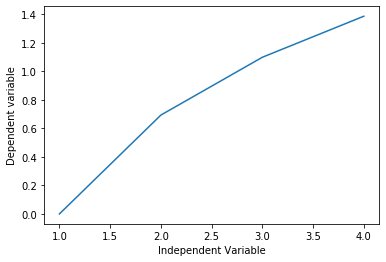

In [24]:
X = np.arange(-5.0, 5.0, 1.0)

Y = np.log(X)

plt.plot(X,Y)
plt.ylabel('Dependent variable')
plt.xlabel('Independent Variable')
plt.show()

Sigmoidal/Logistic

$$ \ Y = a + \frac{b}{1+ c^{(X-d)}}$$

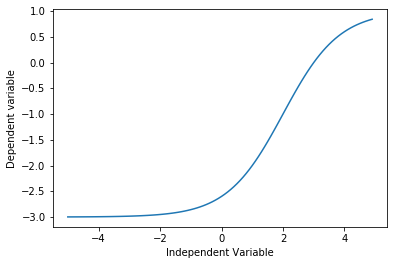

In [26]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y)
plt.ylabel('Dependent variable')
plt.xlabel('Independent Variable')
plt.show()

# Non-Linear Regression Example

Let's fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.


In [33]:
!wget  -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2021-06-25 12:15:34 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


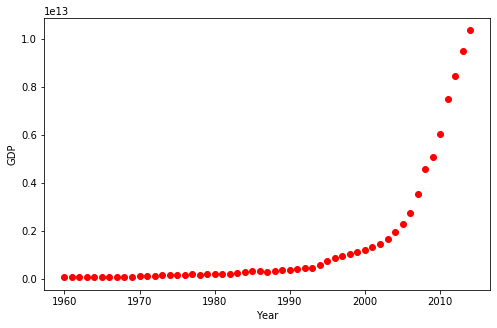

In [34]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Choosing a Model

From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end.

The formula for logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$


$\beta_1$ : controls the steepness of the curve

$\beta_2$ : Slides the curve on the x-axis

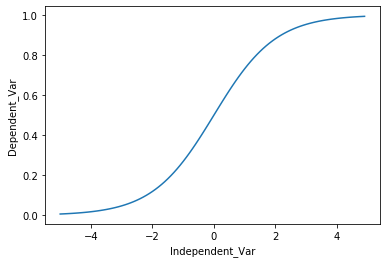

In [40]:
X = np.arange(-5,5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y)
plt.ylabel('Dependent_Var')
plt.xlabel('Independent_Var')
plt.show()

# Building the Model

Now, let's build our regression model and initialize it's parameters.

In [41]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

Let's take a look at the sample sigmoid line that might fit with the data:

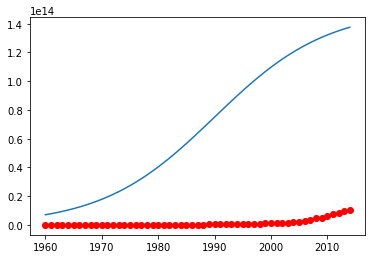

In [43]:
beta_1 = 0.10
beta_2 = 1990.0

# logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# plot the initial prediction agains datapoints
plt.plot(x_data, Y_pred*150000000000000.)
plt.plot(x_data, y_data, 'ro')

# Find the Best parameters for our Model

Our task here is to find the best paramaters for our model. Let's first normalize our x and y:

x_data = x_data/max(x_data)
y_data = y_data/max(y_data)

In [44]:
x_data = x_data/max(x_data) 
y_data = y_data/max(y_data)

# How we find the best parameters for our fit line?

We can use **curve fit** which uses non-linear least squares to fit our sigmoid function to data. Optimal values for the paramenter so that the sum of the squared residuals of sigmoid(x_data, *popt) - ydata is minimized

popt = optimized parameters

In [45]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_data, y_data)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453018, beta_2 = 0.997207


# Plotting the resulting regression model


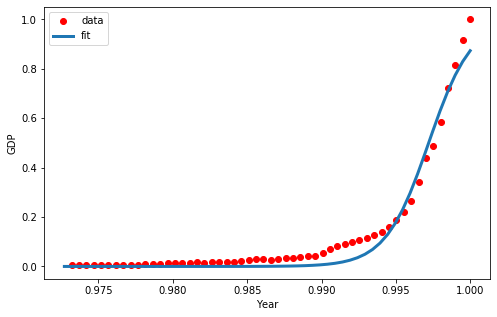

In [48]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)

plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Accuracy of our Model

Let's calculate the accuracy of our model

In [50]:
# split the data into train/test
msk = np.random.rand(len(df)) < 0.8

train_x = x_data[msk]
test_x = x_data[msk]

train_y = y_data[msk]
test_y = y_data[~msk]

In [51]:
# build the model using the train set

popt, pcov = curve_fit(sigmoid, train_x, train_y)


/Users/badisamosesane/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [52]:
# predict using test set
y_hat = sigmoid(test_x, *popt)

ValueError: operands could not be broadcast together with shapes (44,) (11,) 